In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from warnings import filterwarnings
filterwarnings("ignore")

# <font color="red">Basic Information about both Data and Stroke</font>
- Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.

- <b><font color="orange"> Bmi </font></b>(can be represented as obesity) 

- <b><font color="orange">High blood pressure(hypertension)</font></b> ->> Blood pressure of 140/90 or higher can damage blood vessels (arteries) that supply blood to the brain.

- <b><font color="orange">Heart disease</font></b> ->> Heart disease is the second most important risk factor for stroke, and the major cause of death among survivors of stroke. Heart disease and stroke have many of the same risk factors.

- <b><font color="orange">Diabetes (average glucose level)</font></b> ->> People with diabetes are at greater risk for a stroke than someone without diabetes.

- <b><font color="orange">Smoking</font></b> ->> Smoking almost doubles your risk for an ischemic stroke.


## <font color="purple">Reading Related Files</font>

In [66]:
df_train = pd.read_csv("./csv_‎files/train.csv")
df_test = pd.read_csv("./csv_‎files/test.csv")
sample_submission = pd.read_csv("./csv_‎files/sample_submission.csv")
original_data = pd.read_csv("./csv_‎files/stroke-data.csv")

## <font color="purple">Controlling Variables whether They Contain Null or Not</font>

In [67]:
df_train.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [68]:
df_test.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

In [69]:
original_data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [70]:
df_train.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0


In [71]:
df_test.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,15304,Female,57.0,0,0,Yes,Private,Rural,82.54,33.4,Unknown
1,15305,Male,70.0,1,0,Yes,Private,Urban,72.06,28.5,Unknown
2,15306,Female,5.0,0,0,No,children,Urban,103.72,19.5,Unknown


In [72]:
original_data.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


## <font color="purple">Merging Train and Original Dataset</font>
- As we know, we can support our dataset with suitable datasets, you can find the related datset on kaggle.com 
- Also, we dont need id column at our original data because we dont want it appears when we are visualising our dataset.

In [73]:
original_data = (pd.concat([original_data,df_train],axis=0)).drop(columns=["id"])

In [74]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20414 entries, 0 to 15303
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             20414 non-null  object 
 1   age                20414 non-null  float64
 2   hypertension       20414 non-null  int64  
 3   heart_disease      20414 non-null  int64  
 4   ever_married       20414 non-null  object 
 5   work_type          20414 non-null  object 
 6   Residence_type     20414 non-null  object 
 7   avg_glucose_level  20414 non-null  float64
 8   bmi                20213 non-null  float64
 9   smoking_status     20414 non-null  object 
 10  stroke             20414 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 1.9+ MB


### <font color="red">As we can see, some values are missing on bmi column, we can handle by doing;</font>
- Deleting because non values are not that much
- Filling with mean, or median depending on the column or distribution of values
- or we can leave it as it is, if we use tree based algorithms, some of them are supporting missing values

In [75]:
original_data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### <font color="purple">Separating Numericals and Categoricals to be able to Visualise</font>

In [76]:
numerical_vars = original_data.select_dtypes(np.number).drop(columns=["stroke"])
categorical_vars = original_data.select_dtypes("object")

In [77]:
numerical_vars.head(3)

,age,hypertension,heart_disease,avg_glucose_level,bmi
0,67.0,0,1,228.69,36.6
1,61.0,0,0,202.21,NaN
2,80.0,0,1,105.92,32.5


In [78]:
categorical_vars.tail(3)

,gender,ever_married,work_type,Residence_type,smoking_status
15301,Female,Yes,Self-employed,Urban,never smoked
15302,Male,Yes,Private,Rural,Unknown
15303,Female,No,Private,Rural,never smoked


### <font color="purple">Passing through the Visualisation Side</font>
- First,getting info. about how many values that categorical variables have by using unique method
- Then we can pass our graph and describe side

In [79]:
print(pd.unique(categorical_vars["gender"]))
print(pd.unique(categorical_vars["smoking_status"]))
print(pd.unique(categorical_vars["ever_married"]))
print(pd.unique(categorical_vars["work_type"]))
print(pd.unique(categorical_vars["Residence_type"]))

['Male' 'Female' 'Other']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']


### <font color="red">Interpretting the Variables</font>
- Bmi ->> According to the max. value, some patient/s have high obesity risk
- Avg_Glucose_Level ->> %75 of people have normal glucose level, but still some people has higher levels 

In [80]:
numerical_vars.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
age,20414.000000,41.870510,21.756482,0.080000,25.000000,43.000000,58.000000,82.000000
hypertension,20414.000000,0.061673,0.240567,0.000000,0.000000,0.000000,0.000000,1.000000
heart_disease,20414.000000,0.031008,0.173344,0.000000,0.000000,0.000000,0.000000,1.000000
avg_glucose_level,20414.000000,93.322256,32.476351,55.120000,75.220000,86.250000,99.730000,271.740000
bmi,20213.000000,28.302280,7.021765,10.300000,23.500000,27.700000,32.200000,97.600000


### <font color="red"> HistPlot Side  </font>
- Age generally distributed between 20 and 60
- Glucose levels seem normal but there are some high values
- Bmi also same, but we cant see clearly at graph, thats why we used describe method

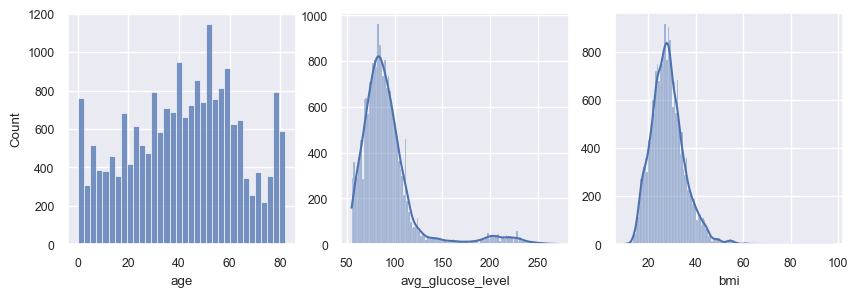

In [81]:
plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
sns.histplot(numerical_vars["age"])
plt.subplot(1,3,2)
g1=sns.histplot(numerical_vars["avg_glucose_level"],kde=True)
g1.set(ylabel=None)
plt.subplot(1,3,3)
g1=sns.histplot(numerical_vars["bmi"],kde=True)
g1.set(ylabel=None)
plt.show()

### <font color="red"> BoxPlot Side  </font>
- Since avg_glucose_level seems normal, as we can see there are some values are higher
- At Bmi, there are higher values like greater than 40, it means the people that who have greater than 40 value can carry high obesity risk

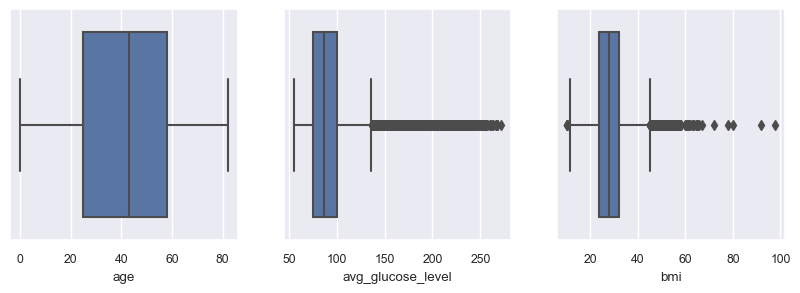

In [82]:
plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
sns.boxplot(numerical_vars["age"]);
plt.subplot(1,3,2)
sns.boxplot(numerical_vars["avg_glucose_level"]);
plt.subplot(1,3,3)
sns.boxplot(numerical_vars["bmi"]);

### <font color="red"> CountPlot Side </font>
- Many female people never smoked, at the same time, unkown situation for many people
- For both gender, many people are working on private sector
- At Residence Type column, interestingly same amount of men and women living both urban and rural side.
   

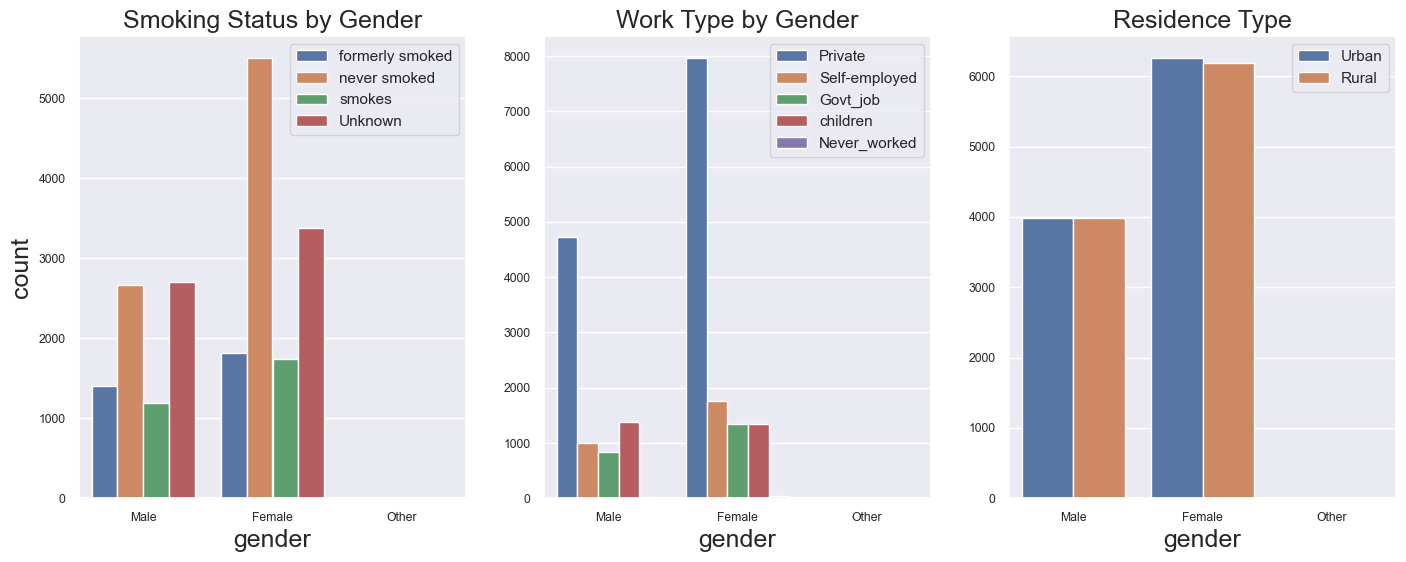

In [83]:
plt.figure(figsize=(17,6))

plt.subplot(1,3,1)
plt.title("Smoking Status by Gender",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.xlabel("Gender",fontsize=18)
sns.countplot(x=categorical_vars["gender"],hue="smoking_status",data=categorical_vars);
plt.legend(loc=1, prop={'size': 11})

plt.subplot(1,3,2)
plt.title("Work Type by Gender",fontsize=18)
plt.xlabel("Gender",fontsize=18)
g1=sns.countplot(x=categorical_vars["gender"],hue="work_type",data=categorical_vars);
g1.set(ylabel=None)
plt.legend(loc=1, prop={'size': 11})

plt.subplot(1,3,3)
plt.title("Residence Type",fontsize=18)
plt.xlabel("Gender",fontsize=18)
g1=sns.countplot(x=categorical_vars["gender"],hue="Residence_type",data=categorical_vars);
plt.legend(loc=1, prop={'size': 11})
g1.set(ylabel=None)

plt.show()


### <font color="red"> StripPlot Side </font>
- As we can see, women people are more than men
- The people who has stroke generally distributed between 40-80, young people have only few
- It seems that lower Bmi levels have more stroke rate, there are only few strokes at higher Bmi/s
- Both low and high level glucose have strokes, but low values have more stroke rate
   

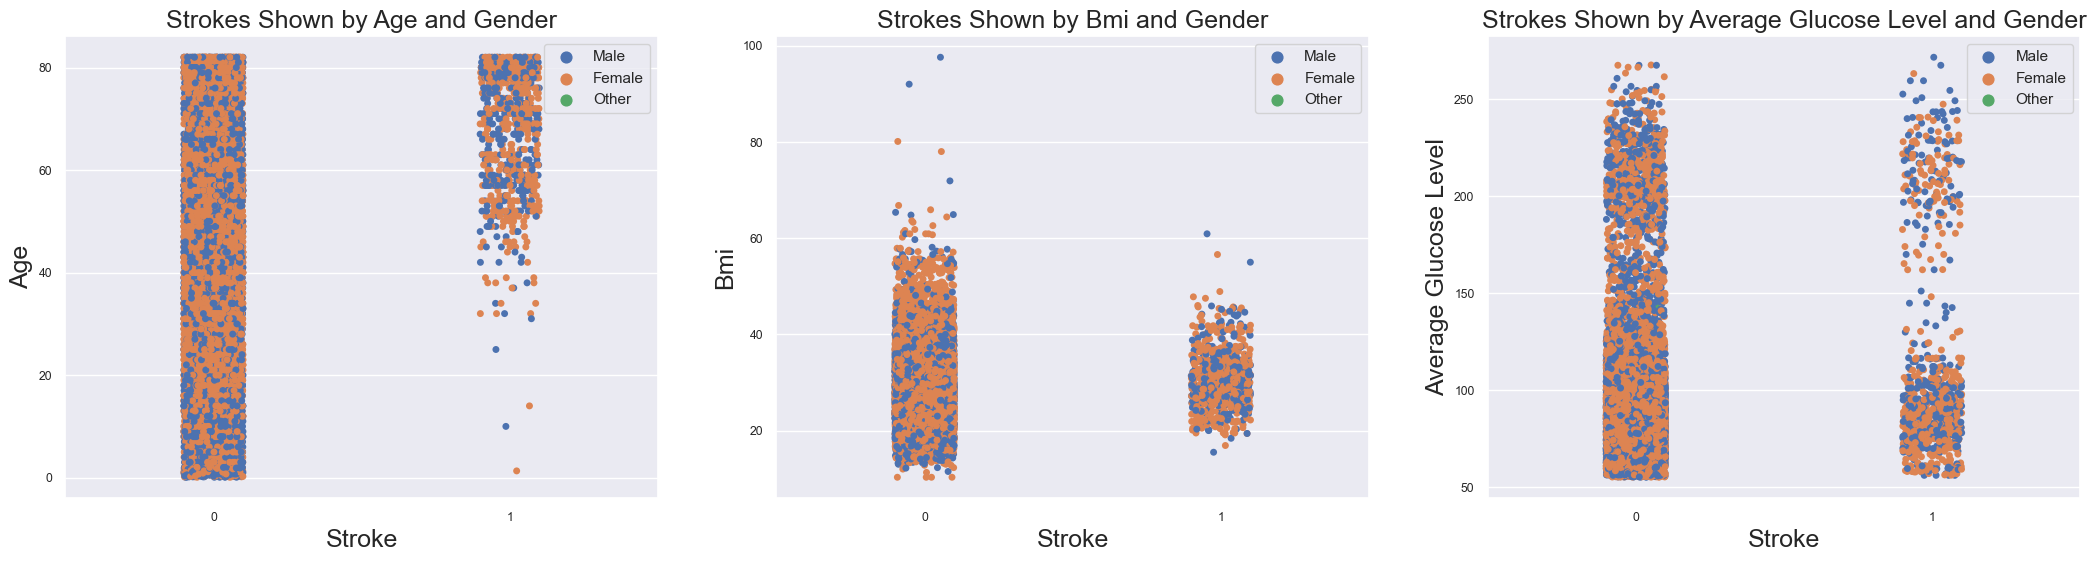

In [84]:
plt.figure(figsize=(26,6))

plt.subplot(1,3,1)
plt.title("Strokes Shown by Age and Gender",fontsize=18)
sns.stripplot(x="stroke",y="age",hue="gender",data=original_data)
plt.xlabel("Stroke",fontsize=18)
plt.ylabel("Age",fontsize=18)
plt.legend(loc=1, prop={'size': 11})

plt.subplot(1,3,2)
plt.title("Strokes Shown by Bmi and Gender",fontsize=18)
sns.stripplot(x="stroke",y="bmi",hue="gender",data=original_data)
plt.xlabel("Stroke",fontsize=18)
plt.ylabel("Bmi",fontsize=18)
plt.legend(loc=1, prop={'size': 11})

plt.subplot(1,3,3)
plt.title("Strokes Shown by Average Glucose Level and Gender",fontsize=18)
sns.stripplot(x="stroke",y="avg_glucose_level",hue="gender",data=original_data)
plt.xlabel("Stroke",fontsize=18)
plt.ylabel("Average Glucose Level",fontsize=18)
plt.legend(loc=1, prop={'size':11})

plt.show()



### <font color="red"> ScatterPlot Side </font>
- For first graph, people who are between 20-60 have high bmi values for this data
- According to the second graph, older age>40 people have high glucose level, that means, these people can have diabetics.
- For last graph, if your glucose value is low your bmi is low, too. That means, it can follow same way.
   

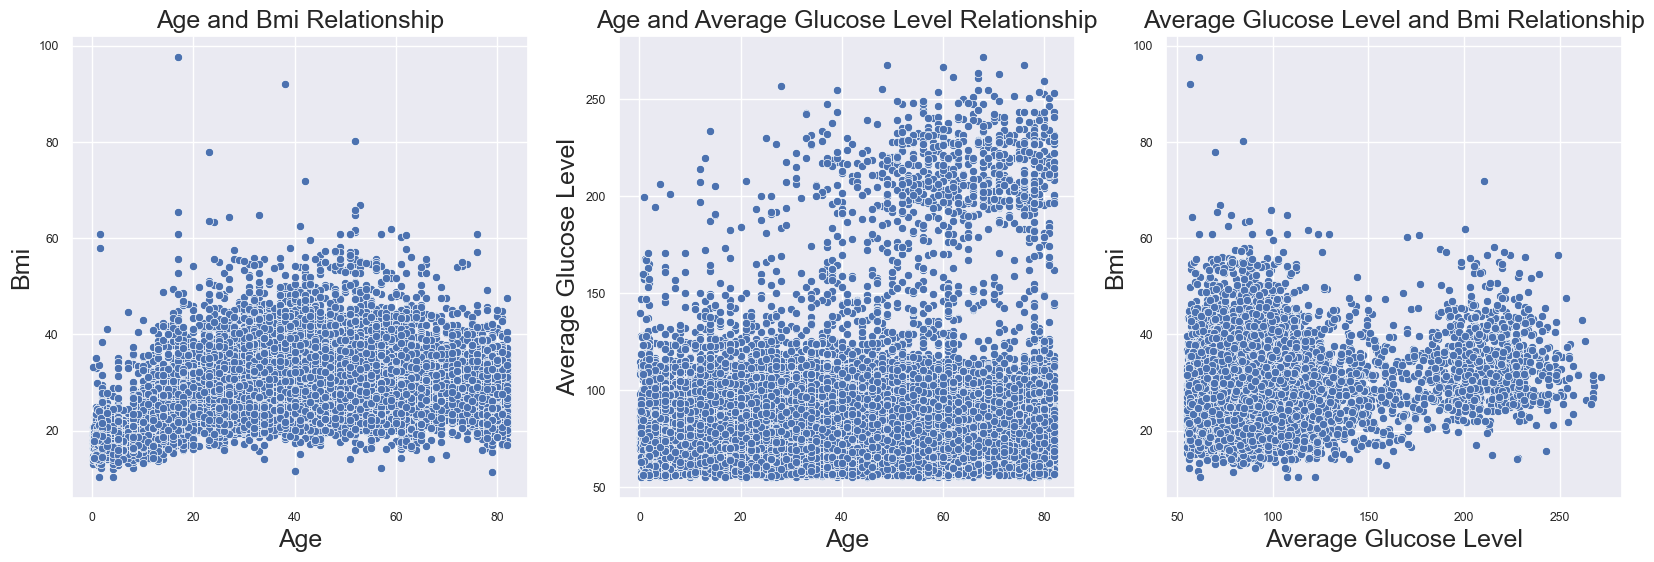

In [85]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.title("Age and Bmi Relationship",fontsize=18)
plt.xlabel("Age",fontsize=18)
plt.ylabel("Bmi",fontsize=18)
sns.scatterplot(x="age",y="bmi",data=original_data)

plt.subplot(1,3,2)
plt.title("Age and Average Glucose Level Relationship",fontsize=18)
plt.xlabel("Age",fontsize=18)
plt.ylabel("Average Glucose Level",fontsize=18)
sns.scatterplot(x="age",y="avg_glucose_level",data=original_data)

plt.subplot(1,3,3)
plt.title("Average Glucose Level and Bmi Relationship",fontsize=18)
plt.xlabel("Average Glucose Level",fontsize=18)
plt.ylabel("Bmi",fontsize=18)
sns.scatterplot(x="avg_glucose_level",y="bmi",data=original_data)

plt.show()


### <font color="red"> CountPlot Side </font>
- According to this graphs, less people have hypertension and heart disease

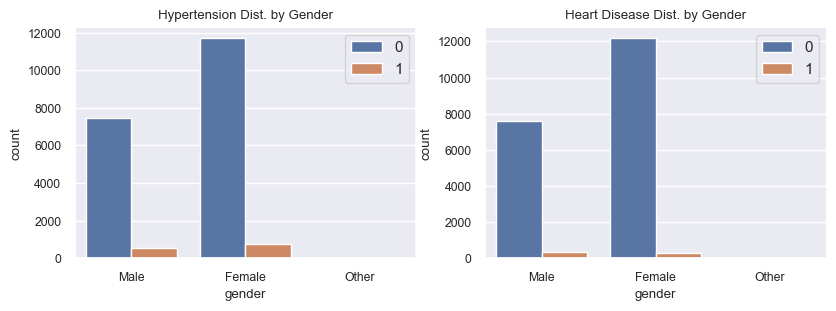

In [86]:
plt.figure(figsize=(15,3))
#-------------------------- CountPlot Side --------------------------
plt.subplot(1,3,1)
plt.title("Hypertension Dist. by Gender")
sns.countplot(x=original_data["gender"],hue="hypertension",data=original_data);
plt.legend(loc=1,prop={"size":11})

plt.subplot(1,3,2)
plt.title("Heart Disease Dist. by Gender")
sns.countplot(x=original_data["gender"],hue="heart_disease",data=original_data);
plt.legend(loc=1,prop={"size":11})

plt.show();

### <font color="red"> CountPlot Side </font>
- For this heatmap, we can order relations as or valiable impact on stroke is ;
- Age, hypertension,avg_glucose_level,heart_disease, and bmi

In [87]:
df_corr = original_data.corr()

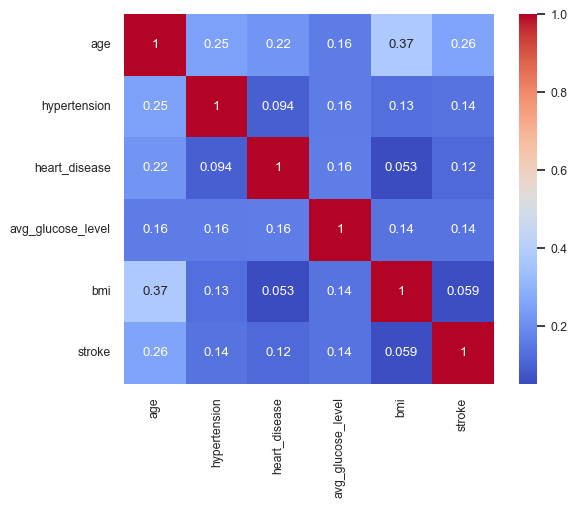

In [88]:
sns.set(font_scale=0.8)
# plt.figure(figsize=(20,20))
sns.heatmap(df_corr,annot=True,cmap="coolwarm",square=True)
plt.show()

## <font color="purple"> Passing to the Model Side </font>
- Separation of dependent and independent variable/s, preparing the dataset for algorithms or models.
- Filling nulls with mean for machine learning side


In [89]:
original_data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [90]:
original_data.fillna(original_data["bmi"].mean(),inplace=True)

In [92]:
X = original_data.iloc[:,:-1]
y = original_data.iloc[:,-1]
X = pd.get_dummies(X,drop_first=True)

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV

In [94]:
X_train, X_test, y_train , y_test = train_test_split(X,y,random_state=42)

### <font color="red"> Creating ROC Curve  </font>

In [106]:
model = LogisticRegression(solver="liblinear").fit(X_train,y_train)

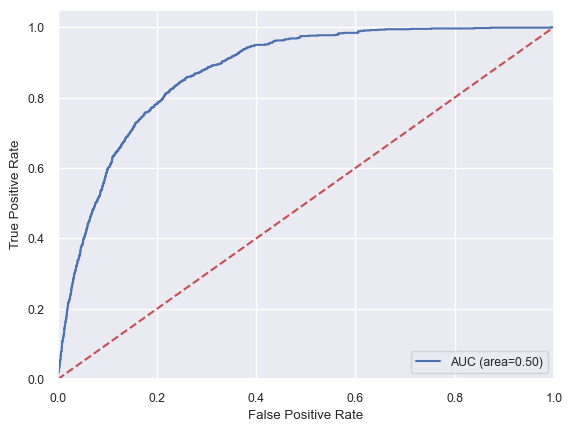

In [109]:
# We can visualize ROC Curve

roc_auc=roc_auc_score(y,model.predict(X))
fpr,tpr,thresholds = roc_curve(y,model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr,tpr,label="AUC (area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

- ### <font color="purple"> Consequently,it tell us that  %50TP and FP rate </font>

In [118]:
model.score(X_test,y_test)

0.9578761755485894